## Naufaldi Attributes
Exploration on Age, Gender, Maturity Size, FurLength and Quantity

After exploration, all attributes don't have missing values and clean

In [1]:
#import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv("train.csv")

In [3]:
#Importing data from GitHub
url = "https://raw.githubusercontent.com/naufaldi-fir/adoption-prediction-project/main/Data%20Set/test.csv"
df = pd.read_csv(url)

In [4]:
print(df.head(10))

   Type                       Name  Age  Breed1  Breed2  Gender  Color1  \
0     2               Dopey & Grey    8     266     266       1       2   
1     2                    Chi Chi   36     285     264       2       1   
2     2                     Sticky    2     265       0       1       6   
3     1  Dannie & Kass [In Penang]   12     307       0       2       2   
4     2                    Cuddles   12     265       0       1       2   
5     2                   Porridge    4     265       0       1       6   
6     2      Sultan [In Shah Alam]   24     265       0       1       6   
7     2  The Four Musketeers (one)    1     265       0       1       1   
8     2            Timmy And Boboy    7     247     266       3       2   
9     1                   Precious   36      76     307       2       7   

   Color2  Color3  MaturitySize  ...  Sterilized  Health  Quantity  Fee  \
0       6       7             1  ...           2       1         2    0   
1       4       7       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3561 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

general_insight_1: name and description columns have less non-null count.

faizan insight 05/06/21 from his notebook

Insight_1: There are 14993 (around 15k animals in the dataset)
Insight_2: There are less names and descriptions (13736 and 14981 respectively) than the number of animals which implies that not all animals have a name
Insight_3: For majority of the animals, there was no adoption after 100 days of being listed.
Insight_4: There are more number of dogs than cats in the dataset
Insight_5: Majority of the animals are healthy

In [6]:
mapping = {1:"Dog", 2:"Cat"}
df["Type"]  = df["Type"].replace(mapping)
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,Cat,Dopey & Grey,8,266,266,1,2,6,7,1,...,2,1,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.0
1,Cat,Chi Chi,36,285,264,2,1,4,7,2,...,1,2,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.0
2,Cat,Sticky,2,265,0,1,6,7,0,2,...,2,1,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.0
3,Dog,Dannie & Kass [In Penang],12,307,0,2,2,5,0,2,...,1,1,2,0,41326,e59c106e9912fa30c898976278c2e834,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,5.0
4,Cat,Cuddles,12,265,0,1,2,3,7,2,...,1,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,5.0


### Age 

In [7]:
# Age distribution attribute mit box plot. Age in months
# df.plot(kind = "box", y = "Age")

plotting with box plot doesn't show clear picture about distribution

<AxesSubplot:xlabel='Age'>

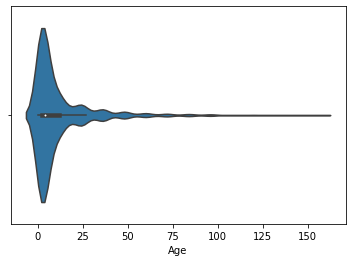

In [8]:
# Age distribution with violin plot
sns.violinplot(data = df, x = "Age", orient = "h", xlabel = "test")

In [9]:
df.Age.describe()

count    3972.000000
mean       11.290534
std        17.497150
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       156.000000
Name: Age, dtype: float64

Age_insight_1: 50% of pet is under 3 months, and 75% under 12 months.

<AxesSubplot:xlabel='Age'>

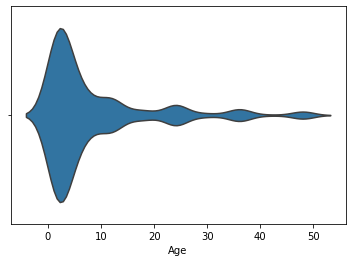

In [10]:
#Age distribution under 50 months
sns.violinplot(data = df[(df.Age < 50)],x = "Age", orient = "h", inner = None)

### Comparing Cat and Dog Age Distribution

<AxesSubplot:xlabel='Age', ylabel='Type'>

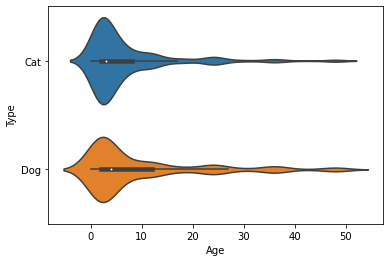

In [11]:
# Age distribution with violin plot
sns.violinplot(data = df[(df.Age < 50)], y = "Type", x = "Age")

### Gender

Gender
1    1504
2    1878
3     590
Name: Gender, dtype: int64


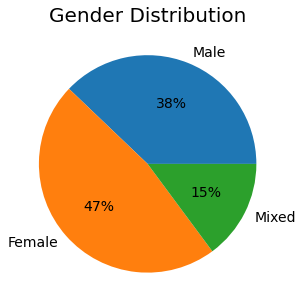

In [23]:
labels = "1:male, 2:female, 3:mixed"
pie_gender = df.groupby("Gender")["Gender"].count()
pie_gender.plot(kind = "pie",autopct = lambda p: "{:.0f}%".format(p),figsize = (5,5),
                labels = ["Male","Female","Mixed"],textprops = {"fontsize":14})
plt.title("Gender Distribution", fontsize = 20)
plt.ylabel("")
#plt.autopct
#plt.xlabel(labels)

print(pie_gender)

1: Male, 2: female, 3: Mixed

Gender_Insight_1 : Majority of pets are female (2)

### Comparing Gender distribution in Dog and Cat

In [25]:
# filtering dog and cat
dog = df[df.Type == "Dog"]
cat = df[df.Type == "Cat"]

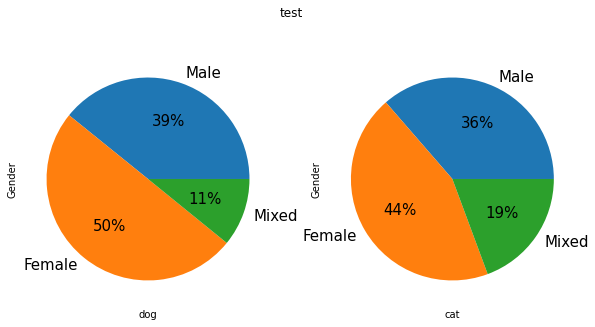

In [47]:
#visualizing gender
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
dog_pie = dog.groupby("Gender")["Gender"].count()
dog_pie.plot.pie(autopct = lambda p: "{:.0f}%".format(p), labels = ["Male","Female","Mixed"],textprops = {"fontsize":15})
#plt.pie(dog_pie)
plt.xlabel("dog")

plt.subplot(1,2,2)
cat_pie = cat.groupby("Gender")["Gender"].count()
cat_pie.plot.pie(autopct = lambda p: "{:.0f}%".format(p), labels = ["Male","Female","Mixed"],textprops = {"fontsize":15})
plt.xlabel("cat")
#plt.pie(cat_pie)

fig.suptitle("test")

plt.show()
plt.close()

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
(endgoal)

### Maturity size

MaturitySize
1     951
2    2674
3     344
4       3
Name: MaturitySize, dtype: int64


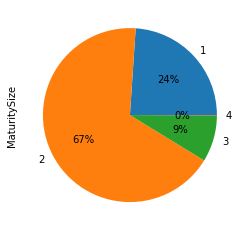

In [15]:
pie_size = df.groupby("MaturitySize")["MaturitySize"].count()
print(pie_size)
pie_size.plot.pie(autopct = lambda p: "{:.0f}%".format(p));

1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified

Size_insight_1: Majority are in medium size

Size_insight_2: Because the quantity of extra large animal are small,  we can remove or combine it with category 3.

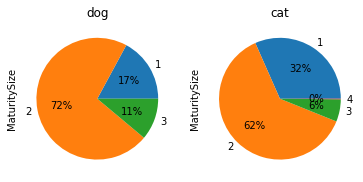

In [16]:
#visualizing Maturity Size
ax1 = plt.subplot(1,2,1)
dog_pie = dog.groupby("MaturitySize")["MaturitySize"].count()
#dog_pie.plot.pie(autopct = "%.0f") #berhasil tanpa tulisan persen
dog_pie.plot.pie(autopct = lambda p: "{:.0f}%".format(p))
#plt.pie(dog_pie)
plt.title("dog")

plt.subplot(1,2,2)
cat_pie = cat.groupby("MaturitySize")["MaturitySize"].count()
cat_pie.plot.pie(autopct = lambda p: "{:.0f}%".format(p))
plt.title("cat")
#plt.pie(cat_pie)

plt.show()

### Fur Length

FurLength
1    2408
2    1338
3     226
Name: FurLength, dtype: int64


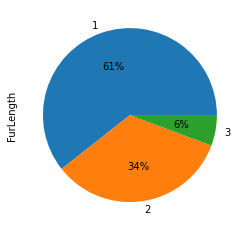

In [17]:
pie_group = df.groupby("FurLength")["FurLength"].count()
print(pie_group)
pie_group.plot.pie(autopct = lambda p: "{:.0f}%".format(p));

1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified

FurLength_insight_1: Majority has short fur

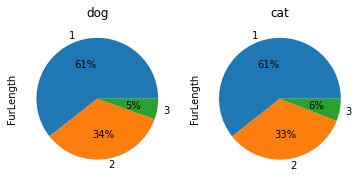

In [18]:
#visualizing Maturity Size
plt.subplot(1,2,1)
dog_pie = dog.groupby("FurLength")["FurLength"].count()
dog_pie.plot.pie(autopct = lambda p: "{:.0f}%".format(p))
#plt.pie(dog_pie)
plt.title("dog")

plt.subplot(1,2,2)
cat_pie = cat.groupby("FurLength")["FurLength"].count()
cat_pie.plot.pie(autopct = lambda p: "{:.0f}%".format(p))
plt.title("cat")
#plt.pie(cat_pie)

plt.show()

### Quantity

In [19]:
bar_quantity = df.groupby("Quantity")["Quantity"].count()
print(bar_quantity)

Quantity
1     3058
2      356
3      199
4      137
5       97
6       63
7       31
8        9
9        6
10       4
11       3
13       1
14       2
15       2
19       1
20       3
Name: Quantity, dtype: int64


In [20]:
##visualize with bar plot subplots
#fig, ax = plt.subplots()
#ax.set_title("Number of quantity")
#sns.countplot(data = df,x = "Quantity", ax = ax)

Text(0.5, 1.0, 'Number of Quantity')

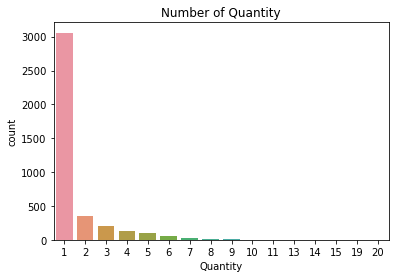

In [21]:
sns.countplot(data = df, x = "Quantity")
plt.title("Number of Quantity")

Majority_insight_1: Majority pets that are posted is alone